<a href="https://colab.research.google.com/github/yalexdor/MetroCDMX/blob/main/Lineas_del_metro_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba 1  del Algoritmo

RESULTADOS DEL ALGORITMO ACO
Mejor ruta (índices): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Mejor ruta (nombres): Observatorio -> Tacubaya -> Juanacatlán -> Chapultepec -> Sevilla -> Insurgentes -> Cuauhtémoc -> Balderas -> Salto del Agua -> Isabel la Católica -> Pino Suárez -> Merced -> Candelaria -> San Lázaro -> Moctezuma -> Balbuena -> Blvd. Puerto Aéreo -> Gómez Farías -> Zaragoza -> Pantitlán
Distancia total: 70.30 km


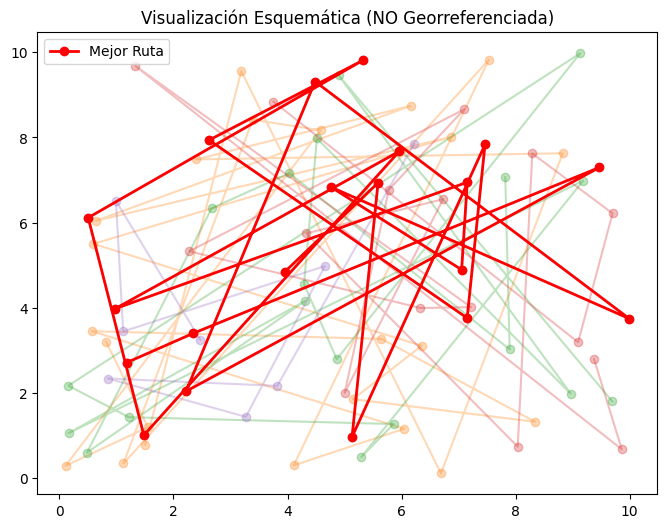

In [ ]:
# ===================================================
# PROYECTO: Optimización de Rutas del Metro CDMX con ACO
# Líneas: 1, 2, 3, 8, 9
# Total de 86 estaciones, cada una asignada a una sola línea
# ===================================================

import numpy as np
import matplotlib.pyplot as plt
import random

# ----------------------------------------------------------------
# 1. Enumeración ÚNICA de las 86 estaciones
#    (se les asigna un índice y se listan según línea)
# ----------------------------------------------------------------

# Línea 1 (20 estaciones) -> índices 0..19
# Observatorio(0), Tacubaya(1), Juanacatlán(2), Chapultepec(3), Sevilla(4),
# Insurgentes(5), Cuauhtémoc(6), Balderas(7), Salto del Agua(8), Isabel la Católica(9),
# Pino Suárez(10), Merced(11), Candelaria(12), San Lázaro(13), Moctezuma(14),
# Balbuena(15), Blvd. Puerto Aéreo(16), Gómez Farías(17), Zaragoza(18), Pantitlán(19).

# Línea 2 (23 estaciones) -> índices 20..42
# Cuatro Caminos(20), Panteones(21), Tacuba(22), Cuitláhuac(23), Popotla(24),
# Colegio Militar(25), Normal(26), San Cosme(27), Revolución(28), Hidalgo(29),
# Bellas Artes(30), Allende(31), Zócalo(32), San Antonio Abad(33), Chabacano(34),
# Viaducto(35), Xola(36), Villa de Cortés(37), Nativitas(38), Portales(39),
# Ermita(40), General Anaya(41), Tasqueña(42).

# Línea 3 (19 estaciones) -> índices 43..61
# Indios Verdes(43), Deportivo 18 de Marzo(44), Potrero(45), La Raza(46), Tlatelolco(47),
# Guerrero(48), Juárez(49), Niños Héroes(50), Hospital General(51), Centro Médico(52),
# Etiopía(53), Eugenia(54), División del Norte(55), Zapata(56), Coyoacán(57),
# Viveros(58), Miguel Ángel de Quevedo(59), Copilco(60), Universidad(61).

# Línea 8 (16 estaciones) -> índices 62..77
# Garibaldi(62), San Juan de Letrán(63), Doctores(64), Obrera(65), La Viga(66),
# Santa Anita(67), Coyuya(68), Iztacalco(69), Apatlaco(70), Aculco(71),
# Escuadrón 201(72), Atlalilco(73), Iztapalapa(74), Cerro de la Estrella(75),
# UAM-I(76), Constitución de 1917(77).

# Línea 9 (8 estaciones) -> índices 78..85
# Patriotismo(78), Chilpancingo(79), Lázaro Cárdenas(80), Jamaica(81),
# Mixiuhca(82), Velódromo(83), Ciudad Deportiva(84), Puebla(85).

# Diccionario unificado de 86 estaciones:
estaciones_dic = {
    # Línea 1
    0: "Observatorio",
    1: "Tacubaya",
    2: "Juanacatlán",
    3: "Chapultepec",
    4: "Sevilla",
    5: "Insurgentes",
    6: "Cuauhtémoc",
    7: "Balderas",
    8: "Salto del Agua",
    9: "Isabel la Católica",
    10: "Pino Suárez",
    11: "Merced",
    12: "Candelaria",
    13: "San Lázaro",
    14: "Moctezuma",
    15: "Balbuena",
    16: "Blvd. Puerto Aéreo",
    17: "Gómez Farías",
    18: "Zaragoza",
    19: "Pantitlán",

    # Línea 2
    20: "Cuatro Caminos",
    21: "Panteones",
    22: "Tacuba",
    23: "Cuitláhuac",
    24: "Popotla",
    25: "Colegio Militar",
    26: "Normal",
    27: "San Cosme",
    28: "Revolución",
    29: "Hidalgo",
    30: "Bellas Artes",
    31: "Allende",
    32: "Zócalo",
    33: "San Antonio Abad",
    34: "Chabacano",
    35: "Viaducto",
    36: "Xola",
    37: "Villa de Cortés",
    38: "Nativitas",
    39: "Portales",
    40: "Ermita",
    41: "General Anaya",
    42: "Tasqueña",

    # Línea 3
    43: "Indios Verdes",
    44: "Deportivo 18 de Marzo",
    45: "Potrero",
    46: "La Raza",
    47: "Tlatelolco",
    48: "Guerrero",
    49: "Juárez",
    50: "Niños Héroes",
    51: "Hospital General",
    52: "Centro Médico",
    53: "Etiopía",
    54: "Eugenia",
    55: "División del Norte",
    56: "Zapata",
    57: "Coyoacán",
    58: "Viveros",
    59: "Miguel Ángel de Quevedo",
    60: "Copilco",
    61: "Universidad",

    # Línea 8
    62: "Garibaldi",
    63: "San Juan de Letrán",
    64: "Doctores",
    65: "Obrera",
    66: "La Viga",
    67: "Santa Anita",
    68: "Coyuya",
    69: "Iztacalco",
    70: "Apatlaco",
    71: "Aculco",
    72: "Escuadrón 201",
    73: "Atlalilco",
    74: "Iztapalapa",
    75: "Cerro de la Estrella",
    76: "UAM-I",
    77: "Constitución de 1917",

    # Línea 9
    78: "Patriotismo",
    79: "Chilpancingo",
    80: "Lázaro Cárdenas",
    81: "Jamaica",
    82: "Mixiuhca",
    83: "Velódromo",
    84: "Ciudad Deportiva",
    85: "Puebla"
}

# ---------------------------------------------------------
# 2. Definir las cinco líneas como listas de índices
# ---------------------------------------------------------
linea_1 = list(range(0, 20))    # 0..19
linea_2 = list(range(20, 43))   # 20..42
linea_3 = list(range(43, 62))   # 43..61
linea_8 = list(range(62, 78))   # 62..77
linea_9 = list(range(78, 86))   # 78..85

lineas = [linea_1, linea_2, linea_3, linea_8, linea_9]

# ---------------------------------------------------------
# 3. Crear la matriz de distancias
#    - Tamaño: 86x86 (todas las estaciones)
#    - Asignar distancias aleatorias [2..5] entre estaciones
#      consecutivas de cada línea.
#    - 0 representa que no hay conexión directa.
# ---------------------------------------------------------
n = len(estaciones_dic)  # = 86
matriz_distancias = np.zeros((n, n))

for linea in lineas:
    for i in range(len(linea) - 1):
        a = linea[i]
        b = linea[i + 1]
        dist = random.uniform(2, 5)  # Distancia aleatoria
        matriz_distancias[a][b] = dist
        # Si deseas bidireccional, descomenta la siguiente línea:
        # matriz_distancias[b][a] = dist

# -------------------------------------------------------------------------
# 4. Implementación del Algoritmo de Colonias de Hormigas (ACO)
# -------------------------------------------------------------------------
class ACO:
    def __init__(self, matriz_dist, num_hormigas=10, alfa=1.0, beta=2.0,
                 evaporacion=0.1, iteraciones=50):
        """
        :param matriz_dist: Matriz de distancias (numpy array).
        :param num_hormigas: Número de hormigas en cada iteración.
        :param alfa: Peso de las feromonas en la fórmula de probabilidad.
        :param beta: Peso de la visibilidad (1/distancia).
        :param evaporacion: Tasa de evaporación de feromonas.
        :param iteraciones: Número total de iteraciones a ejecutar.
        """
        self.matriz_dist = matriz_dist
        self.num_hormigas = num_hormigas
        self.alfa = alfa
        self.beta = beta
        self.evaporacion = evaporacion
        self.iteraciones = iteraciones

        self.n = len(matriz_dist)

        # Matriz de feromonas inicial: un valor constante bajo
        self.feromonas = np.ones((self.n, self.n)) * 0.1

        # Matriz de visibilidad: 1 / distancia cuando hay conexión
        # y 0 en caso contrario
        self.visibilidad = np.zeros((self.n, self.n))
        for i in range(self.n):
            for j in range(self.n):
                if self.matriz_dist[i][j] > 0:
                    self.visibilidad[i][j] = 1.0 / self.matriz_dist[i][j]

    def optimizar(self, nodo_inicio, nodo_fin):
        """
        Ejecuta el ciclo principal de iteraciones.
        Retorna la mejor ruta y la mejor distancia hallada.
        """
        mejor_ruta = None
        mejor_distancia = float('inf')

        for _ in range(self.iteraciones):
            rutas_iter = []
            dist_iter = []

            # Cada hormiga construye una ruta
            for _ in range(self.num_hormigas):
                ruta, dist_ruta = self._construir_ruta(nodo_inicio, nodo_fin)
                rutas_iter.append(ruta)
                dist_iter.append(dist_ruta)

                # Verificamos si la mejor de esta hormiga supera el récord
                if dist_ruta < mejor_distancia and len(ruta) > 1:
                    mejor_ruta = ruta
                    mejor_distancia = dist_ruta

            # Actualizamos feromonas (evaporación + refuerzo)
            self._actualizar_feromonas(rutas_iter, dist_iter)

        return mejor_ruta, mejor_distancia

    def _construir_ruta(self, nodo_inicio, nodo_fin):
        """
        Construye la ruta de una hormiga desde nodo_inicio hasta nodo_fin,
        avanzando con base en probabilidades calculadas por feromonas y visibilidad.
        """
        ruta = [nodo_inicio]
        distancia_ruta = 0.0

        # Se pone un límite de pasos para evitar ciclos infinitos
        paso_max = self.n * 2

        while (ruta[-1] != nodo_fin) and (len(ruta) < paso_max):
            actual = ruta[-1]
            probabilidades = self._calcular_probabilidades(actual, ruta)

            # Si no hay probabilidad positiva de moverse, se detiene la hormiga
            if np.sum(probabilidades) == 0:
                break

            # Selección probabilística (ruleta)
            siguiente = np.random.choice(range(self.n), p=probabilidades)

            ruta.append(siguiente)
            distancia_ruta += self.matriz_dist[actual][siguiente]

        return ruta, distancia_ruta

    def _calcular_probabilidades(self, nodo_actual, ruta_actual):
        """
        Calcula las probabilidades de ir a cada vecino.
        P(i->j) = [tau(i,j)^alfa * eta(i,j)^beta] / sum(...) para todos j
        donde tau es la feromona y eta es la visibilidad. Se excluyen nodos ya visitados.
        """
        prob = np.zeros(self.n)

        for j in range(self.n):
            # Debe existir conexión y no haber sido visitado
            if self.matriz_dist[nodo_actual][j] > 0 and (j not in ruta_actual):
                tau = self.feromonas[nodo_actual][j] ** self.alfa
                eta = self.visibilidad[nodo_actual][j] ** self.beta
                prob[j] = tau * eta

        # Normalizamos
        suma = np.sum(prob)
        if suma > 0:
            prob /= suma

        return prob

    def _actualizar_feromonas(self, rutas, distancias):
        """
        Evaporación global y refuerzo de feromonas
        inversamente proporcional a la distancia de cada hormiga.
        """
        # Evaporación
        self.feromonas *= (1 - self.evaporacion)

        # Depósito de feromonas
        for ruta, dist_r in zip(rutas, distancias):
            if dist_r <= 0:  # evitar div. por cero
                continue
            contrib = 1.0 / dist_r
            for k in range(len(ruta) - 1):
                a = ruta[k]
                b = ruta[k + 1]
                self.feromonas[a][b] += contrib
                # Para bidireccional, descomentar:
                # self.feromonas[b][a] += contrib

# --------------------------------------------------------------------------
# 5. Ejemplo de uso del ACO
#    - Buscar la mejor ruta desde Observatorio (0) hasta Pantitlán (19)
# --------------------------------------------------------------------------
if __name__ == "__main__":
    # Instanciamos el ACO con parámetros ajustables
    aco = ACO(
        matriz_dist=matriz_distancias,
        num_hormigas=10,
        alfa=1.0,
        beta=2.0,
        evaporacion=0.1,
        iteraciones=60
    )

    nodo_inicio = 0   # Observatorio
    nodo_fin = 19     # Pantitlán

    mejor_ruta, mejor_distancia = aco.optimizar(nodo_inicio, nodo_fin)

    print("=======================================")
    print("RESULTADOS DEL ALGORITMO ACO")
    print("=======================================")
    if mejor_ruta:
        # Convertimos índices a nombres
        ruta_nombres = [estaciones_dic[i] for i in mejor_ruta]
        print("Mejor ruta (índices):", mejor_ruta)
        print("Mejor ruta (nombres):", " -> ".join(ruta_nombres))
        print(f"Distancia total: {mejor_distancia:.2f} km")
    else:
        print("No se encontró una ruta factible.")

    # ----------------------------------------------------------------------
    # 6. (Opcional) Visualización Sencilla de la Red y la Mejor Ruta
    #    Nota: Esta visualización NO corresponde a posiciones reales,
    #    sólo es un grafo aleatorio para ilustrar.
    # ----------------------------------------------------------------------
    # Asignamos coordenadas aleatorias (ejemplo simple)
    coords = { i: (random.random()*10, random.random()*10) for i in range(n) }

    plt.figure(figsize=(8,6))

    # Dibujar las líneas
    for l in lineas:
        xs = [coords[idx][0] for idx in l]
        ys = [coords[idx][1] for idx in l]
        plt.plot(xs, ys, marker='o', linestyle='-', alpha=0.3)

    # Dibujar la mejor ruta en rojo
    if mejor_ruta:
        rx = [coords[idx][0] for idx in mejor_ruta]
        ry = [coords[idx][1] for idx in mejor_ruta]
        plt.plot(rx, ry, marker='o', color='red', linewidth=2, label='Mejor Ruta')

    plt.title("Visualización Esquemática (NO Georreferenciada)")
    plt.legend()
    plt.show()


# Instalacion de Bibliotecas nesesarias para el codigo


In [ ]:
pip install pdf2image

In [ ]:
!apt-get update
!apt-get install -y poppler-utils


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,197 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,632 kB]
Fetched 4,225 kB in 2s (2,623 kB/s)
Reading pack

# "Algoritmo de Colonias de Hormigas (ACO) Determinista"

========== RESULTADOS ACO DETERMINISTA ==========
Mejor ruta (indices): [0, 82, 2, 3, 4, 5, 6, 50, 8, 9, 32, 11, 12, 13, 14, 15, 16, 17, 18, 93]
Mejor ruta (nombres): Observatorio -> Tacubaya -> Juanacatlán -> Chapultepec -> Sevilla -> Insurgentes -> Cuauhtémoc -> Balderas -> Salto del Agua -> Isabel la Católica -> Pino Suarez -> Merced -> Candelaria -> San Lázaro -> Moctezuma -> Balbuena -> Blvd P A -> Gomez Farias -> Zaragoza -> Pantitlán
Distancia total: 19.00



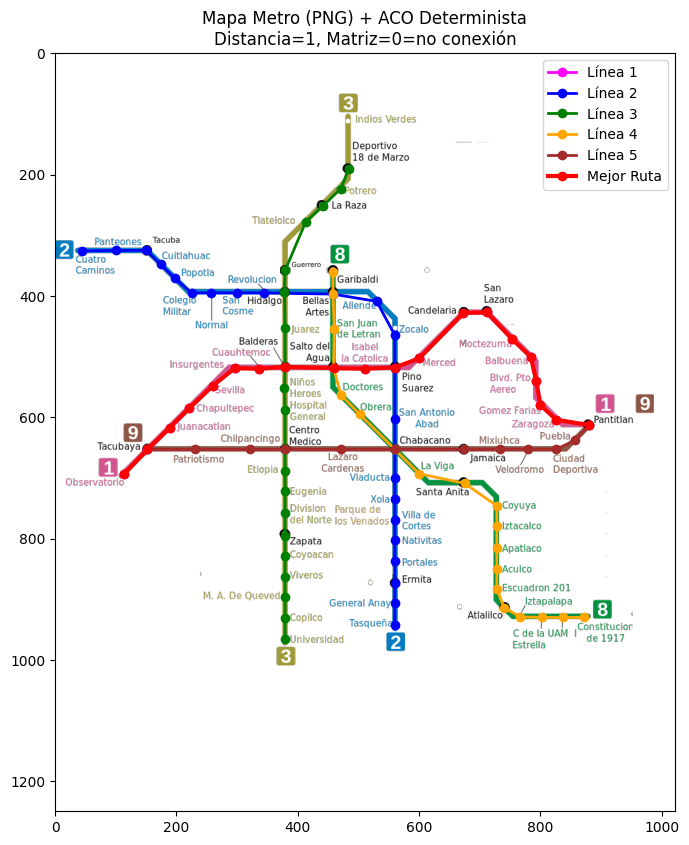

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# 1. Carga la imagen en formato PNG (ajusta el nombre si es distinto)
# =============================================================================
img = plt.imread("metro_cdmx.png")  # Debe ser tu imagen de 1022×1250 (aprox)

# =============================================================================
# 2. Definir las coordenadas de estaciones (según tus datos)
#    OJO: Revisa ortografía y nombres idénticos a tus listas de línea.
# =============================================================================
station_coords = {
    # -----------------------------------
    # LÍNEA 3
    # -----------------------------------
    "Indios Verdes":          (484, 190),
    # NOTA: no diste "Deportivo 18 de Marzo", la saltaste en tu listado
    #       Agrego Potrero, La Raza, Tlatelolco, etc.
    "Potrero":                (471, 223),
    "La raza":                (441, 252),
    "Tlatelolco":             (413, 278),
    "Guerrero":               (379, 358),
    "Hidalgo":                (378, 394),
    "Juárez":                 (379, 453),
    "Balderas":               (379, 517),
    "Niños H":                (378, 552),
    "Hospital G":             (379, 588),
    "Centro Médico":          (379, 653),
    "Etopía":                 (379, 688),
    "Eugenia":                (379, 722),
    "División":               (379, 757),
    "Zapata":                 (379, 795),
    "Coyoacán":               (379, 828),
    "Viveros":                (379, 863),
    "MDQ":                    (379, 896),  # Miguel Ángel de Quevedo
    "Copilco":                (379, 931),
    "Universidad":            (379, 965),

    # -----------------------------------
    # LÍNEA 2
    # -----------------------------------
    "Cuatro caminos":         (45,  326),
    "Panteones":              (100, 325),
    "Tacuba":                 (150, 325),
    "Cuitláhuac":             (174, 348),
    "Popotla":                (197, 371),
    "Colegio M":              (225, 395),  # <-- Revisa, parece un error (34 en Y?)
    "Normal":                 (257, 395),
    "San Cosme":              (300, 395),
    "Revolución":             (344, 395),
    # L2 pasa por "Hidalgo" (ya está en L3).
    "Bellas Artes":           (459, 394),
    "Allende":                (530, 409),
    "Zocalo":                 (560, 465),
    "Pino Suarez":            (560, 518),  # (lo repites en L1, ojo)
    "San Antonio A":          (560, 603),
    "Chabacano":              (560, 653),
    "Viaducto":               (560, 700),
    "Xola":                   (560, 734),
    "Villa de cortes":        (560, 770),
    "Nativitas":              (560, 803),
    "Portales":               (560, 837),
    "Ermita":                 (560, 874),
    "General A":              (560, 907),
    "Tasqueña":               (560, 942),

    # -----------------------------------
    # LÍNEA 1
    # -----------------------------------
    "Observatorio":        (114, 693),
    "Tacubaya":            (152, 653),
    "Juanacatlán":         (189, 617),
    "Chapultepec":         (221, 585),
    "Sevilla":             (260, 548),
    "Insurgentes":         (296, 519),
    "Cuauhtémoc":          (336, 520),
    # Balderas, PinoSuarez repetidos?  Revisar duplicaciones.
    "Balderas":            (379, 517),  # coincide L1 con L3
    "Salto del Agua":      (459, 519),
    "Isabel la Católica":  (510, 520),
    "Pino Suarez":         (560, 518),
    "Merced":              (600, 503),
    "Candelaria":          (673, 428),
    "San Lázaro":          (712, 427),
    "Moctezuma":           (753, 471),
    "Balbuena":            (784, 500),
    "Blvd P A":            (793, 540),
    "Gomez Farias":        (800, 580),
    "Zaragoza":            (826, 604),
    "Pantitlán":           (880, 613),

    # -----------------------------------
    # LÍNEA 8
    # -----------------------------------
    "Garibaldi":         (458, 360),
    "Bellas Artes":      (458, 397),  # repetido con L2 "Bellas Artes" (459,394)
    "San Juan Letran":   (460, 455),
    "Salto del agua":    (459, 519),  # coincide con L1
    "Doctores":          (471, 563),
    "Obrera":            (502, 595),
    "la viga":           (600, 693),
    "Santa Anita":       (675, 709),
    "Coyuya":            (728, 746),
    "Iztacalco":         (728, 780),
    "Apatlaco":          (728, 815),
    "Aculco":            (728, 850),
    "Escuadrón":         (728, 883),
    "Atlalilco":         (740, 914),
    "Iztapalapa":        (767, 929),
    "C de la Estrella":  (802, 930),
    "UAM I":             (837, 930),
    "Constitución 1917": (872, 930),

    # -----------------------------------
    # LÍNEA 9
    # -----------------------------------
    # Tacubaya repetida con L1
    "Patriotismo":       (230, 653),
    "Chilpancingo":      (321, 653),
    "Centro Médico":     (379, 653),  # repetido L3
    "Lázaro Cárdenas":   (472, 653),
    "Chabacano":         (560, 653),  # repetido L2
    "Jamaica":           (674, 653),
    "Mixiuhca":          (734, 653),
    "Velódromo":         (780, 653),
    "Ciudad deportiva":  (825, 653),
    "Puebla":            (857, 638),
    # "Pantitlán" repetido L1
}

# =============================================================================
# 3. Listas de estaciones en orden por línea (debes ajustarlas a tus nombres EXACTOS)
# =============================================================================
line_3 = [
    "Indios Verdes", "Potrero", "La raza", "Tlatelolco", "Guerrero",
    "Hidalgo", "Juárez", "Balderas", "Niños H", "Hospital G",
    "Centro Médico", "Etopía", "Eugenia", "División", "Zapata",
    "Coyoacán", "Viveros", "MDQ", "Copilco", "Universidad"
]

line_2 = [
    "Cuatro caminos", "Panteones", "Tacuba", "Cuitláhuac", "Popotla",
    "Colegio M", "Normal", "San Cosme", "Revolución",
    "Bellas Artes", "Allende", "Zocalo", "Pino Suarez",
    "San Antonio A", "Chabacano", "Viaducto", "Xola", "Villa de cortes",
    "Nativitas", "Portales", "Ermita", "General A", "Tasqueña"
]

line_1 = [
    "Observatorio", "Tacubaya", "Juanacatlán", "Chapultepec", "Sevilla",
    "Insurgentes", "Cuauhtémoc", "Balderas", "Salto del Agua", "Isabel la Católica",
    "Pino Suarez", "Merced", "Candelaria", "San Lázaro", "Moctezuma",
    "Balbuena", "Blvd P A", "Gomez Farias", "Zaragoza", "Pantitlán"
]

line_8 = [
    "Garibaldi", "Bellas Artes", "San Juan Letran", "Salto del agua", "Doctores",
    "Obrera", "Chabacano", "la viga", "Santa Anita", "Coyuya",
    "Iztacalco", "Apatlaco", "Aculco", "Escuadrón", "Atlalilco",
    "Iztapalapa", "C de la Estrella", "UAM I", "Constitución 1917"
]

line_9 = [
    "Tacubaya", "Patriotismo", "Chilpancingo", "Centro Médico",
    "Lázaro Cárdenas", "Chabacano", "Jamaica", "Mixiuhca",
    "Velódromo", "Ciudad deportiva", "Puebla", "Pantitlán"
]

all_lines = [line_1, line_2, line_3, line_8, line_9]

# Concatenamos todas las estaciones (con nombres EXACTOS como en los diccionarios)
all_stations = line_1 + line_2 + line_3 + line_8 + line_9

# Crear un índice para cada estación
station_to_index = {st: i for i, st in enumerate(all_stations)}
n = len(all_stations)

# =============================================================================
# 4. Matriz de distancias (un solo sentido, distancia=1 en tramos consecutivos)
# =============================================================================
matriz_dist = np.zeros((n, n), dtype=float)

for linea in all_lines:
    for i in range(len(linea) - 1):
        A = station_to_index[linea[i]]
        B = station_to_index[linea[i+1]]
        matriz_dist[A][B] = 1.0  # sin aleatorio, unidireccional

# =============================================================================
# 5. Implementación de un ACO determinista (sin aleatoriedad)
# =============================================================================
class ACO:
    def __init__(self, dist_mat, num_hormigas=5, alfa=1.0, beta=2.0,
                 evaporacion=0.1, iteraciones=10):
        self.dist_mat = dist_mat
        self.num_hormigas = num_hormigas
        self.alfa = alfa
        self.beta = beta
        self.evaporacion = evaporacion
        self.iteraciones = iteraciones
        self.n = dist_mat.shape[0]

        # Feromonas iniciales
        self.feromonas = np.ones((self.n, self.n)) * 0.1

        # Visibilidad = 1 / distancia => 1.0 en donde dist=1
        self.visibilidad = np.zeros((self.n, self.n))
        for i in range(self.n):
            for j in range(self.n):
                if self.dist_mat[i][j] > 0:
                    self.visibilidad[i][j] = 1.0 / self.dist_mat[i][j]

    def optimizar(self, idx_inicio, idx_fin):
        mejor_ruta = None
        mejor_dist = float('inf')

        for _ in range(self.iteraciones):
            rutas = []
            distancias = []
            for _h in range(self.num_hormigas):
                ruta, dist_r = self._construir_ruta(idx_inicio, idx_fin)
                rutas.append(ruta)
                distancias.append(dist_r)
                if dist_r < mejor_dist and len(ruta) > 1:
                    mejor_ruta = ruta
                    mejor_dist = dist_r

            self._actualizar_feromonas(rutas, distancias)

        return mejor_ruta, mejor_dist

    def _construir_ruta(self, inicio, fin):
        ruta = [inicio]
        dist_total = 0.0
        max_steps = self.n * 2
        while (ruta[-1] != fin) and (len(ruta) < max_steps):
            actual = ruta[-1]
            siguiente = self._seleccionar_siguiente(actual, ruta)
            if siguiente is None:
                break
            ruta.append(siguiente)
            dist_total += self.dist_mat[actual][siguiente]
        return ruta, dist_total

    def _seleccionar_siguiente(self, nodo_actual, ruta_actual):
        # Seleccion determinista: el mayor tau^alfa * eta^beta
        mejor_j = None
        mejor_val = 0.0
        for j in range(self.n):
            if (self.dist_mat[nodo_actual][j] > 0) and (j not in ruta_actual):
                t = self.feromonas[nodo_actual][j] ** self.alfa
                e = self.visibilidad[nodo_actual][j] ** self.beta
                val = t * e
                if val > mejor_val:
                    mejor_val = val
                    mejor_j = j
        return mejor_j

    def _actualizar_feromonas(self, rutas, dists):
        self.feromonas *= (1 - self.evaporacion)
        for ruta, dist_r in zip(rutas, dists):
            if dist_r <= 0:
                continue
            contrib = 1.0 / dist_r
            for i in range(len(ruta) - 1):
                a = ruta[i]
                b = ruta[i + 1]
                self.feromonas[a][b] += contrib

# =============================================================================
# 6. DEMO: Buscar ruta Observatorio -> Pantitlán (puedes cambiar)
# =============================================================================
start_station = "Observatorio"
end_station   = "Pantitlán"

start_idx = station_to_index[start_station]
end_idx   = station_to_index[end_station]

aco = ACO(matriz_dist, num_hormigas=3, alfa=1.0, beta=2.0,
          evaporacion=0.1, iteraciones=10)

best_route_idx, best_dist = aco.optimizar(start_idx, end_idx)
best_route_names = [all_stations[i] for i in best_route_idx]

print("========== RESULTADOS ACO DETERMINISTA ==========")
print("Mejor ruta (indices):", best_route_idx)
print("Mejor ruta (nombres):", " -> ".join(best_route_names))
print(f"Distancia total: {best_dist:.2f}\n")

# =============================================================================
# 7. Graficar la imagen PNG y superponer líneas
# =============================================================================
fig, ax = plt.subplots(figsize=(8,10))

ax.imshow(img)  # Asegúrate que sea tu "metro_cdmx.png" de ~1022×1250

colors = ["magenta", "blue", "green", "orange", "brown"]  # 5 colores p/5 líneas
for idx, linea in enumerate(all_lines):
    xs, ys = [], []
    for station in linea:
        x, y = station_coords[station]
        xs.append(x)
        ys.append(y)
    ax.plot(xs, ys, marker='o', color=colors[idx],
            linewidth=2, label=f"Línea {idx+1}")

# Dibuja la mejor ruta en rojo
rx, ry = [], []
for st in best_route_names:
    xx, yy = station_coords[st]
    rx.append(xx)
    ry.append(yy)

ax.plot(rx, ry, marker='o', color='red', linewidth=3, label="Mejor Ruta")

ax.set_title("Mapa Metro (PNG) + ACO Determinista\nDistancia=1, Matriz=0=no conexión")
ax.legend()

# Si se ve invertido en Y, prueba:
# plt.gca().invert_yaxis()

plt.show()


#Algoritmo Colonia de Hormigas Proyecto Final

===== RUTAS POSIBLES (Deportivo 18 de Marzo -> General A) =====
Total de rutas encontradas: 2
Ruta #1: Deportivo 18 de Marzo -> Potrero -> La raza -> Tlatelolco -> Guerrero -> Hidalgo -> Juárez -> Balderas -> Salto del Agua -> Isabel la Católica -> Pino Suarez -> San Antonio A -> Chabacano -> Viaducto -> Xola -> Villa de cortes -> Nativitas -> Portales -> Ermita -> General A
Ruta #2: Deportivo 18 de Marzo -> Potrero -> La raza -> Tlatelolco -> Guerrero -> Hidalgo -> Juárez -> Balderas -> Niños H -> Hospital G -> Centro Médico -> Lázaro Cárdenas -> Chabacano -> Viaducto -> Xola -> Villa de cortes -> Nativitas -> Portales -> Ermita -> General A

===== [Versión 1: ACO Determinista] =====
Ruta encontrada: Deportivo 18 de Marzo -> Potrero -> La raza -> Tlatelolco -> Guerrero -> Hidalgo -> Juárez -> Balderas -> Salto del Agua -> Isabel la Católica -> Pino Suarez -> Merced -> Candelaria -> San Lázaro -> Moctezuma -> Balbuena -> Blvd P A -> Gomez Farias -> Zaragoza -> Pantitlán
Distancia total

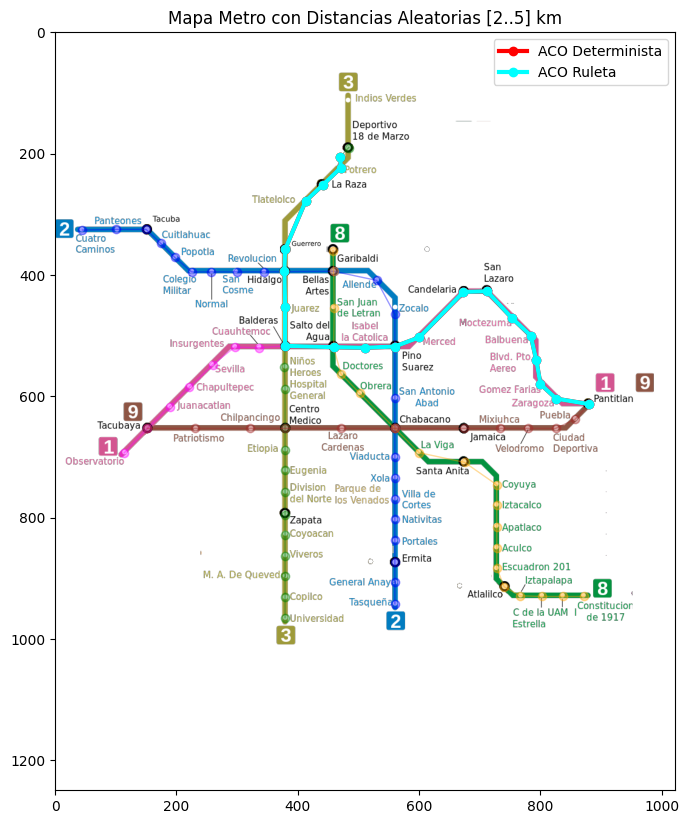

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

########################################################################
# 1. Cargar la imagen PNG (ajusta a tu archivo, p.ej. "metro_cdmx.png")
########################################################################
img = plt.imread("metro_cdmx.png")

########################################################################
# 2. Definir las estaciones (coordenadas) y las 5 líneas
#    Agregamos "Indios Verdes" y "Deportivo 18 de Marzo" para L3
########################################################################

station_coords = {
    # -----------------------------------
    # LÍNEA 3
    # -----------------------------------
    "Indios Verdes":       (484, 190),
    "Deportivo 18 de Marzo": (470, 205),  # aprox, ajusta si deseas
    "Potrero":             (471, 223),
    "La raza":             (441, 252),
    "Tlatelolco":          (413, 278),
    "Guerrero":            (379, 358),
    "Hidalgo":             (378, 394),
    "Juárez":              (379, 453),
    "Balderas":            (379, 517),
    "Niños H":             (378, 552),
    "Hospital G":          (379, 588),
    "Centro Médico":       (379, 653),
    "Etopía":              (379, 688),
    "Eugenia":             (379, 722),
    "División":            (379, 757),
    "Zapata":              (379, 795),
    "Coyoacán":            (379, 828),
    "Viveros":             (379, 863),
    "MDQ":                 (379, 896),
    "Copilco":             (379, 931),
    "Universidad":         (379, 965),

    # -----------------------------------
    # LÍNEA 2
    # -----------------------------------
    "Cuatro caminos":      (45,  326),
    "Panteones":           (100, 325),
    "Tacuba":              (150, 325),
    "Cuitláhuac":          (174, 348),
    "Popotla":             (197, 371),
    "Colegio M":           (225, 395),
    "Normal":              (257, 395),
    "San Cosme":           (300, 395),
    "Revolución":          (344, 395),
    "Bellas Artes":        (459, 394),
    "Allende":             (530, 409),
    "Zocalo":              (560, 465),
    "Pino Suarez":         (560, 518),
    "San Antonio A":       (560, 603),
    "Chabacano":           (560, 653),
    "Viaducto":            (560, 700),
    "Xola":                (560, 734),
    "Villa de cortes":     (560, 770),
    "Nativitas":           (560, 803),
    "Portales":            (560, 837),
    "Ermita":              (560, 874),
    "General A":           (560, 907),
    "Tasqueña":            (560, 942),

    # -----------------------------------
    # LÍNEA 1
    # -----------------------------------
    "Observatorio":     (114, 693),
    "Tacubaya":         (152, 653),
    "Juanacatlán":      (189, 617),
    "Chapultepec":      (221, 585),
    "Sevilla":          (260, 548),
    "Insurgentes":      (296, 519),
    "Cuauhtémoc":       (336, 520),
    "Salto del Agua":   (459, 519),
    "Isabel la Católica": (510, 520),
    "Merced":           (600, 503),
    "Candelaria":       (673, 428),
    "San Lázaro":       (712, 427),
    "Moctezuma":        (753, 471),
    "Balbuena":         (784, 500),
    "Blvd P A":         (793, 540),
    "Gomez Farias":     (800, 580),
    "Zaragoza":         (826, 604),
    "Pantitlán":        (880, 613),
    # Ojo: "Balderas" y "Pino Suarez" repetidos,
    #      se incluyeron en otras líneas

    # -----------------------------------
    # LÍNEA 8
    # -----------------------------------
    "Garibaldi":        (458, 360),
    "San Juan Letran":  (460, 455),
    "Salto del agua":   (459, 519),  # coincide con L1
    "Doctores":         (471, 563),
    "Obrera":           (502, 595),
    "la viga":          (600, 693),
    "Santa Anita":      (675, 709),
    "Coyuya":           (728, 746),
    "Iztacalco":        (728, 780),
    "Apatlaco":         (728, 815),
    "Aculco":           (728, 850),
    "Escuadrón":        (728, 883),
    "Atlalilco":        (740, 914),
    "Iztapalapa":       (767, 929),
    "C de la Estrella": (802, 930),
    "UAM I":            (837, 930),
    "Constitución 1917":(872, 930),

    # -----------------------------------
    # LÍNEA 9
    # -----------------------------------
    "Patriotismo":      (230, 653),
    "Chilpancingo":     (321, 653),
    "Centro Médico":    (379, 653),
    "Lázaro Cárdenas":  (472, 653),
    "Jamaica":          (674, 653),
    "Mixiuhca":         (734, 653),
    "Velódromo":        (780, 653),
    "Ciudad deportiva": (825, 653),
    "Puebla":           (857, 638),
    # Pantitlán ya en L1
}

# Definición de líneas
line_3 = [
    "Indios Verdes", "Deportivo 18 de Marzo", "Potrero", "La raza", "Tlatelolco",
    "Guerrero", "Hidalgo", "Juárez", "Balderas", "Niños H",
    "Hospital G", "Centro Médico", "Etopía", "Eugenia", "División",
    "Zapata", "Coyoacán", "Viveros", "MDQ", "Copilco", "Universidad"
]

line_2 = [
    "Cuatro caminos", "Panteones", "Tacuba", "Cuitláhuac", "Popotla",
    "Colegio M", "Normal", "San Cosme", "Revolución", "Bellas Artes",
    "Allende", "Zocalo", "Pino Suarez", "San Antonio A", "Chabacano",
    "Viaducto", "Xola", "Villa de cortes", "Nativitas", "Portales",
    "Ermita", "General A", "Tasqueña"
]

line_1 = [
    "Observatorio", "Tacubaya", "Juanacatlán", "Chapultepec", "Sevilla",
    "Insurgentes", "Cuauhtémoc", "Balderas", "Salto del Agua", "Isabel la Católica",
    "Pino Suarez", "Merced", "Candelaria", "San Lázaro", "Moctezuma",
    "Balbuena", "Blvd P A", "Gomez Farias", "Zaragoza", "Pantitlán"
]

line_8 = [
    "Garibaldi", "Bellas Artes", "San Juan Letran", "Salto del agua", "Doctores",
    "Obrera", "Chabacano", "la viga", "Santa Anita", "Coyuya",
    "Iztacalco", "Apatlaco", "Aculco", "Escuadrón", "Atlalilco",
    "Iztapalapa", "C de la Estrella", "UAM I", "Constitución 1917"
]

line_9 = [
    "Tacubaya", "Patriotismo", "Chilpancingo", "Centro Médico",
    "Lázaro Cárdenas", "Chabacano", "Jamaica", "Mixiuhca",
    "Velódromo", "Ciudad deportiva", "Puebla", "Pantitlán"
]

all_lines = [line_1, line_2, line_3, line_8, line_9]

########################################################################
# 3. Crear la LISTA UNIFICADA de estaciones y la MATRIZ DE DISTANCIAS
#    Distancias aleatorias [2..5] en cada tramo consecutivo
########################################################################
all_stations = line_1 + line_2 + line_3 + line_8 + line_9
station_to_index = {st: i for i, st in enumerate(all_stations)}
n = len(all_stations)

matriz_dist = np.zeros((n, n), dtype=float)

# Asignación aleatoria de [2..5] km a cada par consecutivo
for linea in all_lines:
    for i in range(len(linea) - 1):
        A = station_to_index[linea[i]]
        B = station_to_index[linea[i+1]]
        dist_random = random.uniform(2.0, 5.0)  # Dist aleatoria
        matriz_dist[A][B] = dist_random  # un solo sentido

########################################################################
# 4. Encontrar TODAS LAS RUTAS desde "Deportivo 18 de Marzo" hasta "General A"
#    para mostrar cuántas hay y listarlas
########################################################################
start_station = "Deportivo 18 de Marzo"
end_station   = "General A"

start_idx = station_to_index[start_station]
end_idx   = station_to_index[end_station]

# -- DFS para enumerar rutas --
def dfs_enumerar_rutas(matriz, actual, destino, visitados):
    """
    Retorna lista de TODAS las rutas (cada ruta es una lista de índices)
    desde 'actual' hasta 'destino', evitando revisitar nodos.
    """
    if actual == destino:
        return [[actual]]

    rutas = []
    visitados.add(actual)
    for nxt in range(matriz.shape[1]):
        if matriz[actual][nxt] > 0 and (nxt not in visitados):
            # Hay conexión y no visitado
            subrutas = dfs_enumerar_rutas(matriz, nxt, destino, visitados)
            for sr in subrutas:
                rutas.append([actual] + sr)
    visitados.remove(actual)
    return rutas

todas_rutas_idx = dfs_enumerar_rutas(matriz_dist, start_idx, end_idx, set())
todas_rutas_nombres = []
for r_idx in todas_rutas_idx:
    todas_rutas_nombres.append([all_stations[i] for i in r_idx])

print("===== RUTAS POSIBLES (Deportivo 18 de Marzo -> General A) =====")
print(f"Total de rutas encontradas: {len(todas_rutas_nombres)}")
for i, ruta in enumerate(todas_rutas_nombres, 1):
    print(f"Ruta #{i}: {' -> '.join(ruta)}")

########################################################################
# 5. DEFINIR 2 VERSIONES DE ACO
########################################################################

# ---------------------------------------------------------------------
# 5A. VERSIÓN 1: ACO Determinista (selección argmax)
# ---------------------------------------------------------------------
class ACO_Determinista:
    def __init__(self, dist_matrix, num_hormigas=5, alfa=1.0, beta=2.0,
                 evaporacion=0.1, iteraciones=10):
        self.dist_matrix = dist_matrix
        self.num_hormigas = num_hormigas
        self.alfa = alfa
        self.beta = beta
        self.evaporacion = evaporacion
        self.iteraciones = iteraciones
        self.n = dist_matrix.shape[0]

        # Feromonas inicial
        self.feromonas = np.ones((self.n, self.n)) * 0.1
        # Visibilidad
        self.visibilidad = np.zeros((self.n, self.n))
        for i in range(self.n):
            for j in range(self.n):
                if self.dist_matrix[i][j] > 0:
                    self.visibilidad[i][j] = 1.0 / self.dist_matrix[i][j]

    def optimizar(self, idx_inicio, idx_fin):
        mejor_ruta = None
        mejor_dist = float('inf')

        for _ in range(self.iteraciones):
            rutas_iter = []
            dists_iter = []
            for _h in range(self.num_hormigas):
                ruta, dist_r = self._construir_ruta(idx_inicio, idx_fin)
                rutas_iter.append(ruta)
                dists_iter.append(dist_r)
                if dist_r < mejor_dist and len(ruta) > 1:
                    mejor_ruta = ruta
                    mejor_dist = dist_r

            self._actualizar_feromonas(rutas_iter, dists_iter)

        return mejor_ruta, mejor_dist

    def _construir_ruta(self, inicio, fin):
        ruta = [inicio]
        dist_total = 0.0
        max_steps = self.n * 2
        while (ruta[-1] != fin) and (len(ruta) < max_steps):
            actual = ruta[-1]
            nxt = self._seleccionar_siguiente(actual, ruta)
            if nxt is None:
                break
            ruta.append(nxt)
            dist_total += self.dist_matrix[actual][nxt]
        return ruta, dist_total

    def _seleccionar_siguiente(self, nodo_actual, visitados):
        mejor_j = None
        mejor_val = 0.0
        for j in range(self.n):
            if (self.dist_matrix[nodo_actual][j] > 0) and (j not in visitados):
                t = self.feromonas[nodo_actual][j] ** self.alfa
                e = self.visibilidad[nodo_actual][j] ** self.beta
                val = t * e
                if val > mejor_val:
                    mejor_val = val
                    mejor_j = j
        return mejor_j

    def _actualizar_feromonas(self, rutas, dists):
        self.feromonas *= (1 - self.evaporacion)
        for ruta, dist_r in zip(rutas, dists):
            if dist_r <= 0:
                continue
            contrib = 1.0 / dist_r
            for i in range(len(ruta)-1):
                a = ruta[i]
                b = ruta[i+1]
                self.feromonas[a][b] += contrib


# ---------------------------------------------------------------------
# 5B. VERSIÓN 2: ACO con Ruleta (probabilístico, sin np.random.choice)
# ---------------------------------------------------------------------
class ACO_Ruleta:
    def __init__(self, dist_matrix, num_hormigas=5, alfa=1.0, beta=2.0,
                 evaporacion=0.1, iteraciones=10):
        self.dist_matrix = dist_matrix
        self.num_hormigas = num_hormigas
        self.alfa = alfa
        self.beta = beta
        self.evaporacion = evaporacion
        self.iteraciones = iteraciones
        self.n = dist_matrix.shape[0]

        # Feromonas inicial
        self.feromonas = np.ones((self.n, self.n)) * 0.1
        # Visibilidad
        self.visibilidad = np.zeros((self.n, self.n))
        for i in range(self.n):
            for j in range(self.n):
                if self.dist_matrix[i][j] > 0:
                    self.visibilidad[i][j] = 1.0 / self.dist_matrix[i][j]

    def optimizar(self, idx_inicio, idx_fin):
        mejor_ruta = None
        mejor_dist = float('inf')

        for _ in range(self.iteraciones):
            rutas_iter = []
            dists_iter = []
            for _h in range(self.num_hormigas):
                ruta, dist_r = self._construir_ruta(idx_inicio, idx_fin)
                rutas_iter.append(ruta)
                dists_iter.append(dist_r)
                if dist_r < mejor_dist and len(ruta) > 1:
                    mejor_ruta = ruta
                    mejor_dist = dist_r

            self._actualizar_feromonas(rutas_iter, dists_iter)

        return mejor_ruta, mejor_dist

    def _construir_ruta(self, inicio, fin):
        ruta = [inicio]
        dist_total = 0.0
        max_steps = self.n * 2
        while (ruta[-1] != fin) and (len(ruta) < max_steps):
            actual = ruta[-1]
            nxt = self._seleccionar_siguiente(actual, ruta)
            if nxt is None:
                break
            ruta.append(nxt)
            dist_total += self.dist_matrix[actual][nxt]
        return ruta, dist_total

    def _calcular_probabilidades(self, nodo_actual, visitados):
        prob = np.zeros(self.n)
        for j in range(self.n):
            if (self.dist_matrix[nodo_actual][j] > 0) and (j not in visitados):
                t = self.feromonas[nodo_actual][j] ** self.alfa
                e = self.visibilidad[nodo_actual][j] ** self.beta
                prob[j] = t * e
        total = np.sum(prob)
        if total > 0:
            prob /= total
        return prob

    def _seleccionar_siguiente(self, nodo_actual, visitados):
        prob = self._calcular_probabilidades(nodo_actual, visitados)
        if np.sum(prob) == 0:
            return None
        pick = random.random()  # [0..1)
        acum = 0.0
        for j in range(self.n):
            acum += prob[j]
            if pick <= acum:
                return j
        return None

    def _actualizar_feromonas(self, rutas, distancias):
        self.feromonas *= (1 - self.evaporacion)
        for ruta, dist_r in zip(rutas, distancias):
            if dist_r <= 0:
                continue
            contrib = 1.0 / dist_r
            for k in range(len(ruta)-1):
                a = ruta[k]
                b = ruta[k+1]
                self.feromonas[a][b] += contrib


########################################################################
# 6. EJECUTAR AMBAS VERSIONES DESDE "Deportivo 18 de Marzo" -> "General A"
#    Y MOSTRAR LA RUTA Y DISTANCIA
########################################################################

# ---- VERSIÓN 1: DETERMINISTA
aco_det = ACO_Determinista(matriz_dist, num_hormigas=6, alfa=1.0, beta=2.0,
                           evaporacion=0.1, iteraciones=20)
ruta_det, dist_det = aco_det.optimizar(start_idx, end_idx)
ruta_det_nombres = [all_stations[i] for i in ruta_det]

print("\n===== [Versión 1: ACO Determinista] =====")
print("Ruta encontrada:", " -> ".join(ruta_det_nombres))
print(f"Distancia total (km): {dist_det:.2f}")

# ---- VERSIÓN 2: RULETA (PROBABILÍSTICO)
aco_rule = ACO_Ruleta(matriz_dist, num_hormigas=6, alfa=1.0, beta=2.0,
                      evaporacion=0.1, iteraciones=20)
ruta_rule, dist_rule = aco_rule.optimizar(start_idx, end_idx)
ruta_rule_nombres = [all_stations[i] for i in ruta_rule]

print("\n===== [Versión 2: ACO con Ruleta] =====")
print("Ruta encontrada:", " -> ".join(ruta_rule_nombres))
print(f"Distancia total (km): {dist_rule:.2f}")


########################################################################
# 7. MOSTRAR LA IMAGEN y (opcionalmente) las RUTAS en color
#    *Aquí se podría trazar cada línea y la ruta final.
########################################################################
fig, ax = plt.subplots(figsize=(8, 10))
ax.imshow(img)
ax.set_title("Mapa Metro con Distancias Aleatorias [2..5] km")

# Trazamos las líneas (opcionales)
colors = ["magenta", "blue", "green", "orange", "brown"]
for idx, linea in enumerate(all_lines):
    xs = []
    ys = []
    for st in linea:
        if st in station_coords:
            x, y = station_coords[st]
            xs.append(x)
            ys.append(y)
    ax.plot(xs, ys, marker='o', color=colors[idx], linewidth=1, alpha=0.4)

# Podemos resaltar la ruta final de la versión determinista en rojo
rx_d, ry_d = [], []
for st in ruta_det_nombres:
    if st in station_coords:
        xx, yy = station_coords[st]
        rx_d.append(xx)
        ry_d.append(yy)
ax.plot(rx_d, ry_d, marker='o', color='red', linewidth=3, label="ACO Determinista")

# Y la ruta de la versión ruleta en color cian, por ejemplo
rx_r, ry_r = [], []
for st in ruta_rule_nombres:
    if st in station_coords:
        xx, yy = station_coords[st]
        rx_r.append(xx)
        ry_r.append(yy)
ax.plot(rx_r, ry_r, marker='o', color='cyan', linewidth=3, label="ACO Ruleta")

ax.legend()
plt.show()


In [33]:
import numpy as np
import random
import matplotlib.pyplot as plt

#-------------------------------FUNCION PARA GRAFICAR-------------------------------#
def plot_metro_and_routes(img_path,station_coords,lines,route_list=None,route_colors=None):
    if route_list is None: route_list=[]
    if route_colors is None: route_colors=["red","cyan","green","magenta"]
    img=plt.imread(img_path)
    fig,ax=plt.subplots(figsize=(8,10))
    ax.imshow(img)
    ax.set_title("Mapa Metro + Rutas Seleccionadas")
    line_colors=["gray","gray","gray","gray","gray"]  # color tenue para líneas base
    for idx,linea in enumerate(lines):
        xs,ys=[],[]
        for st in linea:
            if st in station_coords:
                x,y=station_coords[st]
                xs.append(x)
                ys.append(y)
        ax.plot(xs,ys,marker='o',color=line_colors[idx],linewidth=1,alpha=0.4)
    for r_i,route_stations in enumerate(route_list):
        rx,ry=[],[]
        for st in route_stations:
            if st in station_coords:
                xx,yy=station_coords[st]
                rx.append(xx)
                ry.append(yy)
        col=route_colors[r_i%len(route_colors)]
        lbl=f"Ruta #{r_i+1}"
        ax.plot(rx,ry,marker='o',color=col,linewidth=2.5,label=lbl)
    ax.legend()
    plt.show()

#-------------------------------DFS PARA ENCONTRAR TODAS LAS RUTAS-------------------------------#
def dfs_enumerar_rutas(matriz,actual,destino,visitados):
    if actual==destino: return[[actual]]
    rutas=[]
    visitados.add(actual)
    for nxt in range(matriz.shape[1]):
        if matriz[actual][nxt]>0 and(nxt not in visitados):
            subrutas=dfs_enumerar_rutas(matriz,nxt,destino,visitados)
            for sr in subrutas:
                rutas.append([actual]+sr)
    visitados.remove(actual)
    return rutas

#-------------------------------ACO DETERMINISTA-------------------------------#
class ACO_Determinista:
    def __init__(self,dist_matrix,num_hormigas=5,alfa=1.0,beta=2.0,evaporacion=0.1,iteraciones=10):
        self.dist_matrix=dist_matrix
        self.num_hormigas=num_hormigas
        self.alfa=alfa
        self.beta=beta
        self.evaporacion=evaporacion
        self.iteraciones=iteraciones
        self.n=dist_matrix.shape[0]
        self.feromonas=np.ones((self.n,self.n))*0.1
        self.visibilidad=np.zeros((self.n,self.n))
        for i in range(self.n):
            for j in range(self.n):
                if self.dist_matrix[i][j]>0:
                    self.visibilidad[i][j]=1.0/self.dist_matrix[i][j]
    def optimizar(self,idx_inicio,idx_fin):
        mejor_ruta=None
        mejor_dist=float('inf')
        for _ in range(self.iteraciones):
            rutas_iter=[]
            dists_iter=[]
            for _h in range(self.num_hormigas):
                ruta,dist_r=self._construir_ruta(idx_inicio,idx_fin)
                rutas_iter.append(ruta)
                dists_iter.append(dist_r)
                if dist_r<mejor_dist and len(ruta)>1:
                    mejor_ruta=ruta
                    mejor_dist=dist_r
            self._actualizar_feromonas(rutas_iter,dists_iter)
        return mejor_ruta,mejor_dist
    def _construir_ruta(self,inicio,fin):
        ruta=[inicio]
        dist_total=0.0
        max_steps=self.n*2
        while(ruta[-1]!=fin)and(len(ruta)<max_steps):
            actual=ruta[-1]
            nxt=self._seleccionar_siguiente(actual,ruta)
            if nxt is None: break
            ruta.append(nxt)
            dist_total+=self.dist_matrix[actual][nxt]
        return ruta,dist_total
    def _seleccionar_siguiente(self,nodo_actual,visitados):
        mejor_j=None
        mejor_val=0.0
        for j in range(self.n):
            if(self.dist_matrix[nodo_actual][j]>0)and(j not in visitados):
                t=self.feromonas[nodo_actual][j]**self.alfa
                e=self.visibilidad[nodo_actual][j]**self.beta
                val=t*e
                if val>mejor_val:
                    mejor_val=val
                    mejor_j=j
        return mejor_j
    def _actualizar_feromonas(self,rutas,dists):
        self.feromonas*=(1-self.evaporacion)
        for ruta,dist_r in zip(rutas,dists):
            if dist_r<=0: continue
            contrib=1.0/dist_r
            for i in range(len(ruta)-1):
                a=ruta[i]
                b=ruta[i+1]
                self.feromonas[a][b]+=contrib

#-------------------------------ACO RULETA (PROBABILÍSTICO)-------------------------------#
class ACO_Ruleta:
    def __init__(self,dist_matrix,num_hormigas=5,alfa=1.0,beta=2.0,evaporacion=0.1,iteraciones=10):
        self.dist_matrix=dist_matrix
        self.num_hormigas=num_hormigas
        self.alfa=alfa
        self.beta=beta
        self.evaporacion=evaporacion
        self.iteraciones=iteraciones
        self.n=dist_matrix.shape[0]
        self.feromonas=np.ones((self.n,self.n))*0.1
        self.visibilidad=np.zeros((self.n,self.n))
        for i in range(self.n):
            for j in range(self.n):
                if self.dist_matrix[i][j]>0:
                    self.visibilidad[i][j]=1.0/self.dist_matrix[i][j]
    def optimizar(self,idx_inicio,idx_fin):
        mejor_ruta=None
        mejor_dist=float('inf')
        for _ in range(self.iteraciones):
            rutas_iter=[]
            dists_iter=[]
            for _h in range(self.num_hormigas):
                ruta,dist_r=self._construir_ruta(idx_inicio,idx_fin)
                rutas_iter.append(ruta)
                dists_iter.append(dist_r)
                if dist_r<mejor_dist and len(ruta)>1:
                    mejor_ruta=ruta
                    mejor_dist=dist_r
            self._actualizar_feromonas(rutas_iter,dists_iter)
        return mejor_ruta,mejor_dist
    def _construir_ruta(self,inicio,fin):
        ruta=[inicio]
        dist_total=0.0
        max_steps=self.n*2
        while(ruta[-1]!=fin)and(len(ruta)<max_steps):
            actual=ruta[-1]
            nxt=self._seleccionar_siguiente(actual,ruta)
            if nxt is None: break
            ruta.append(nxt)
            dist_total+=self.dist_matrix[actual][nxt]
        return ruta,dist_total
    def _calcular_probabilidades(self,nodo_actual,visitados):
        prob=np.zeros(self.n)
        for j in range(self.n):
            if(self.dist_matrix[nodo_actual][j]>0)and(j not in visitados):
                t=self.feromonas[nodo_actual][j]**self.alfa
                e=self.visibilidad[nodo_actual][j]**self.beta
                prob[j]=t*e
        total=np.sum(prob)
        if total>0:
            prob/=total
        return prob
    def _seleccionar_siguiente(self,nodo_actual,visitados):
        prob=self._calcular_probabilidades(nodo_actual,visitados)
        if np.sum(prob)==0:
            return None
        pick=random.random()
        acum=0.0
        for j in range(self.n):
            acum+=prob[j]
            if pick<=acum:
                return j
        return None
    def _actualizar_feromonas(self,rutas,distancias):
        self.feromonas*=(1-self.evaporacion)
        for ruta,dist_r in zip(rutas,distancias):
            if dist_r<=0: continue
            contrib=1.0/dist_r
            for k in range(len(ruta)-1):
                a=ruta[k]
                b=ruta[k+1]
                self.feromonas[a][b]+=contrib

#-------------------------------MAIN O DEMO-------------------------------#
def main():
    print("Ejemplo de uso: aquí pondrías la lógica de asignar distancias aleatorias, crear la matriz, etc.")

#Nota: Ajustar a tu gusto la lógica principal, rutas, etc.
